In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('student.csv')

# Checking for numerical / categorical data types
df.info()
print("\n\nThe only categorical feature is the target.\n\n")

# Checking for missing values
print(df.isnull().sum().sum())
print("\n\nThere are no missing values for all variables.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

[<AxesSubplot: title={'center': 'College Completion Status'}>]


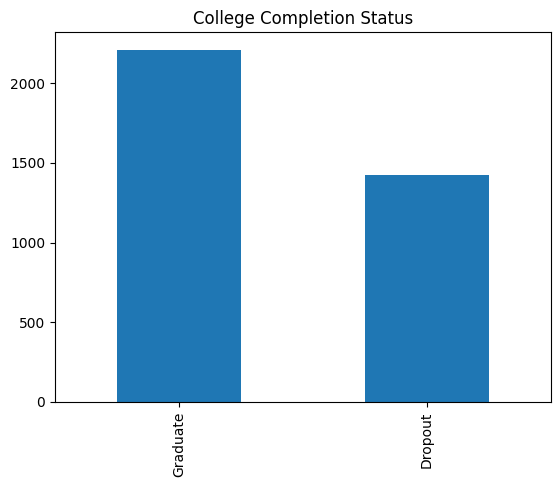

In [2]:
enrolledStudents = df[df['Target'] == 'Enrolled'].index

df.drop(enrolledStudents, inplace=True)

print(df['Target'].value_counts().plot(kind='bar', title=["College Completion Status"], subplots=True))

df['Target'].replace(['Graduate','Dropout'],[1,0],inplace=True)

Because I wanted to prepare this data for a Binary Classification model, I droppped all enrolled students.

I also visualized the Ground Truth's of this Dataset with a Bar Graph where either a student Dropped out or Graduated. 

Then I encoded Graduate with '1' and Dropout with '0' to prepare the dataset for the model.

None
[<AxesSubplot: title={'center': 'Prior education'}>]

Prior Education Totals: 

High School                    3232
Didn't Finish High School       206
Associates                      150
Bachelors                        28
Masters                           7
Didn't Finish Middle School       6
Doctorate                         1
Name: Previous qualification, dtype: int64

Ordinal Encoded Prior Education: 



5    3232
6     206
4     150
3      28
2       7
7       6
1       1
Name: Previous qualification, dtype: int64

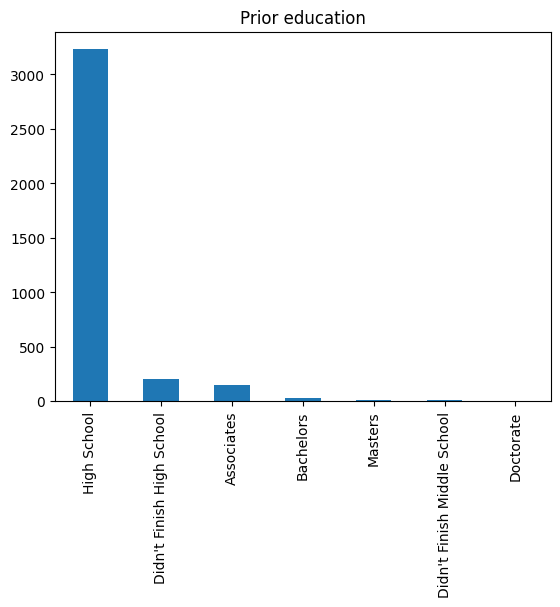

In [3]:
# Reverse Process Prior Education

print(df['Previous qualification'].replace([6,8,9,10,11,12,14,15,16,17],[1,7,7,7,7,7,1,1,3,2], inplace=True))
df['Previous qualification']=df['Previous qualification'].replace([1,2,3,4,5,7,13],["High School","Bachelors","Associates","Masters","Doctorate","Didn't Finish High School","Didn't Finish Middle School"])
print(df['Previous qualification'].value_counts().plot(kind='bar', title=["Prior education"], subplots=True))
print("\nPrior Education Totals: \n")
print(df['Previous qualification'].value_counts())

# Ordinal Encoding of Prior Education

df['Previous qualification']=df['Previous qualification'].replace(["Doctorate","Masters", "Bachelors","Associates","High School","Didn't Finish High School","Didn't Finish Middle School"],[1,2,3,4,5,6,7])
print("\nOrdinal Encoded Prior Education: \n")
df['Previous qualification'].value_counts()


Here I reverse preprocessed the prior education of each student. I combined several previously label encoded categories into finished high school and didn't finish high school. 

Then I manually ordinal encoded where the highest prior degree holders received the best ranking.

[<AxesSubplot: title={'center': "Mother's Occupation"}>]
Unskilled Worker               1323
Administrative Staff            685
Security/Safety                 436
IT                              272
Scientists                      240
Construction/Craft              224
Student                         143
Politician                       87
Other                            85
Fish/Farming/Forest              77
Machine/Assembly Operations      29
Other Skiled Worker              21
Armed Forces                      8
Name: Mother's occupation, dtype: int64


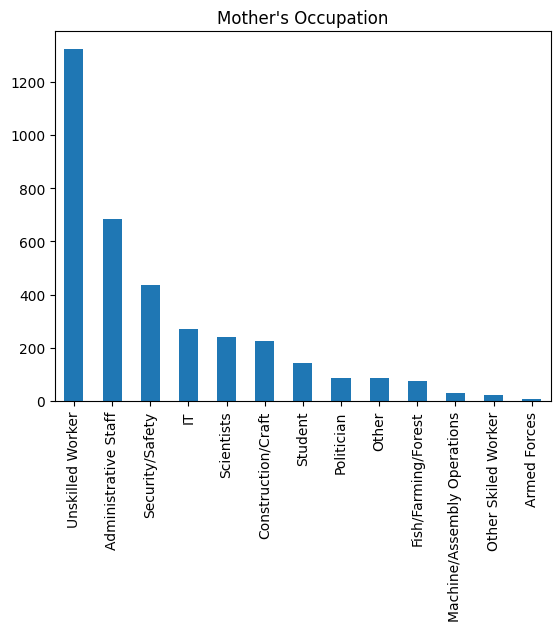

In [4]:
df['Mother\'s occupation'].replace([16,13,15],[11,12,11],inplace=True)
df['Mother\'s occupation'].replace([17,18,19,20,21,22,23,24,25,26,27,28,37,38,40,41,42],[16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16],inplace=True)
df['Mother\'s occupation'].replace([30,31,32,29],[10,10,10,5],inplace=True)
df['Mother\'s occupation'].replace([10,5,6,4,3,8,1,2,7,12,9,11,16],["Unskilled Worker","Administrative Staff","Security/Safety","IT","Scientists","Construction/Craft","Student","Politician","Fish/Farming/Forest","Other","Machine/Assembly Operations","Armed Forces","Other Skiled Worker"],inplace=True)
print(df['Mother\'s occupation'].value_counts().plot(kind='bar', title=["Mother\'s Occupation"], subplots=True))
print(df['Mother\'s occupation'].value_counts())

df['Mother\'s salary']=df['Mother\'s occupation'].replace(["Unskilled Worker","Administrative Staff","Security/Safety","IT",
                                                           "Scientists","Construction/Craft","Student","Politician",
                                                           "Fish/Farming/Forest","Other","Machine/Assembly Operations",
                                                           "Armed Forces","Other Skiled Worker"],
                                                           [10644, 15346, 16302, 29556, 35972,20976,5000,33843,25785, 20000,22334, 21386,18543])
df.drop('Mother\'s occupation', axis=1,inplace=True)


Here I reverse preprocessed Mother's occupation. I combined several previously labeled encoded occupations into one of my given categories where there was public salary data available for Portugal. 

Then, I re-encoded the variable from Occupation to Salary based on mean salary of the profession in Portugal. 

[<AxesSubplot: title={'center': "Father's Occupation"}>]
Unskilled Worker               865
Construction/Craft             558
Security/Safety                410
IT                             321
Administrative Staff           317
Machine/Assembly Operations    263
Armed Forces                   217
Fish/Farming/Forest            196
Scientists                     147
Student                        125
Politician                     111
Other                           82
Other Skiled Worker             18
Name: Father's occupation, dtype: int64


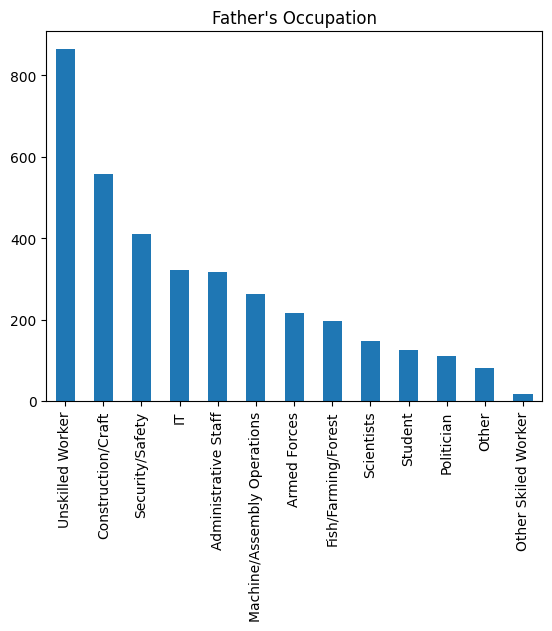

In [5]:
df['Father\'s occupation'].replace([16,13,15,14],[11,12,11,11],inplace=True)
df['Father\'s occupation'].replace([17,18,19,20,21,22,23,24,25,26,27,28,37,38,40,41,42,39],[16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16],inplace=True)
df['Father\'s occupation'].replace([43,44,45,46,30,31,32,29,36,35,33],[10,10,10,10,10,10,10,5,8,7,6],inplace=True)
df['Father\'s occupation'].replace([10,5,6,4,3,8,1,2,7,12,9,11,16],["Unskilled Worker","Administrative Staff","Security/Safety","IT","Scientists","Construction/Craft","Student","Politician","Fish/Farming/Forest","Other","Machine/Assembly Operations","Armed Forces","Other Skiled Worker"],inplace=True)
print(df['Father\'s occupation'].value_counts().plot(kind='bar', title=["Father\'s Occupation"], subplots=True))
print(df['Father\'s occupation'].value_counts())

df['Father\'s salary']=df['Father\'s occupation'].replace(["Unskilled Worker","Administrative Staff","Security/Safety","IT",
                                                           "Scientists","Construction/Craft","Student","Politician",
                                                           "Fish/Farming/Forest","Other","Machine/Assembly Operations",
                                                           "Armed Forces","Other Skiled Worker"],
                                                           [10644, 15346, 16302, 29556, 35972,20976,5000,33843,25785, 20000,22334, 21386,18543])
df.drop('Father\'s occupation', axis=1,inplace=True)



Here I reverse preprocessed Father's occupation. I combined several previously labeled encoded occupations into one of my given categories where there was public salary data available for Portugal. 

Then, I re-encoded the variable from Occupation to Salary based on mean salary of the profession in Portugal. 

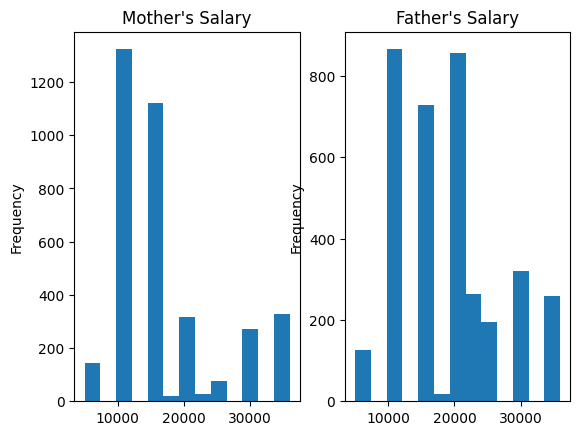

In [6]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,2)

df["Mother\'s salary"].plot(kind='hist', bins=13, ax=axes[0], title="Mother's Salary")

df["Father\'s salary"].plot(kind='hist', bins=13, ax=axes[1],title="Father's Salary")


plt.show()

Here I created two histograms of the two new salary features I replaced occupation with.

The fathers have a more bimodal distibution whereas the mothers have a more skewed right distribution

number of original features: 34
number of new features: 8


Text(0, 0.5, 'Second Principal Component')

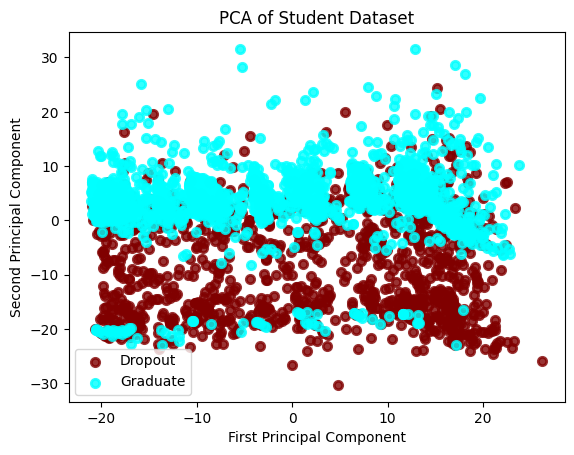

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
df['Mother\'s salary']=normalizer.fit_transform(np.array(df['Mother\'s salary']).reshape(-1,1))
df['Father\'s salary']=normalizer.fit_transform(np.array(df['Father\'s salary']).reshape(-1,1))

studentX, studentY = df.drop('Target', axis=1), df['Target'].values

studentX-=np.mean(studentX, axis=0)

print('number of original features: {}'.format(studentX.shape[1]))

pca = PCA(n_components=8)
studentX_r = pca.fit(studentX).transform(studentX)

print('number of new features: {}'.format(studentX_r.shape[1]))

# visualization
plt.figure()
colors = ['Maroon', 'Aqua']
label_names=['Dropout','Graduate']

for color, i, label in zip(colors, [0, 1], label_names):
    plt.scatter(studentX_r[studentY == i, 0], studentX_r[studentY == i, 1], color=color, alpha=.8, lw=2, label=label)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Student Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


[165.10202844  85.78331825  68.21555742  43.41933457  10.44322789
  23.44989204  17.04602301  17.72615766]
[0.35488573 0.18439068 0.1466289  0.09332958 0.05040539 0.03810226
 0.03664032 0.02244765]


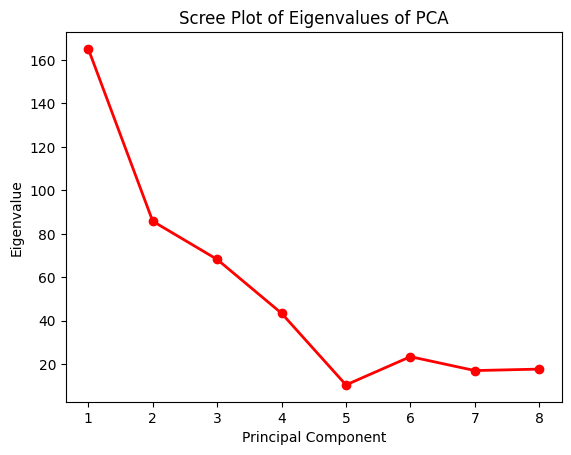

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Get Covariance Matrix
cov_matrix=np.cov(studentX_r.T)

# Get Eigenvalues and Eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

print(eigen_values)

pc_values = np.arange(pca.n_components_) + 1
#plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
#plt.title('Scree Plot of PCA of Student Dataset')
#plt.xlabel('Principal Component')
#plt.ylabel('Variance Explained')
plt.plot(pc_values, eigen_values, 'o-', linewidth=2, color='red')
plt.title("Scree Plot of Eigenvalues of PCA")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")

print(pca.explained_variance_ratio_)
plt.show()



Training Values: 3300, Testing Values: 330
n = 2 components: Hyperparameter: 0.001, Accuracy: 0.785, Recall: 0.963, Precision: 0.768, F1: 0.854, MCC: 0.509
n = 5 components: Hyperparameter: 0.01, Accuracy: 0.809, Recall: 0.935, Precision: 0.805, F1: 0.865, MCC: 0.563
n = 10 components: Hyperparameter: 0.1, Accuracy: 0.882, Recall: 0.931, Precision: 0.893, F1: 0.912, MCC: 0.735
n = 15 components: Hyperparameter: 0.1, Accuracy: 0.882, Recall: 0.921, Precision: 0.900, F1: 0.911, MCC: 0.736
n = 20 components: Hyperparameter: 5, Accuracy: 0.906, Recall: 0.940, Precision: 0.919, F1: 0.929, MCC: 0.791
n = 25 components: Hyperparameter: 0.1, Accuracy: 0.909, Recall: 0.949, Precision: 0.915, F1: 0.932, MCC: 0.797
n = 34 components: Hyperparameter: 10, Accuracy: 0.912, Recall: 0.958, Precision: 0.912, F1: 0.935, MCC: 0.803


Text(0.5, 1.0, 'Learned Model Parameters')

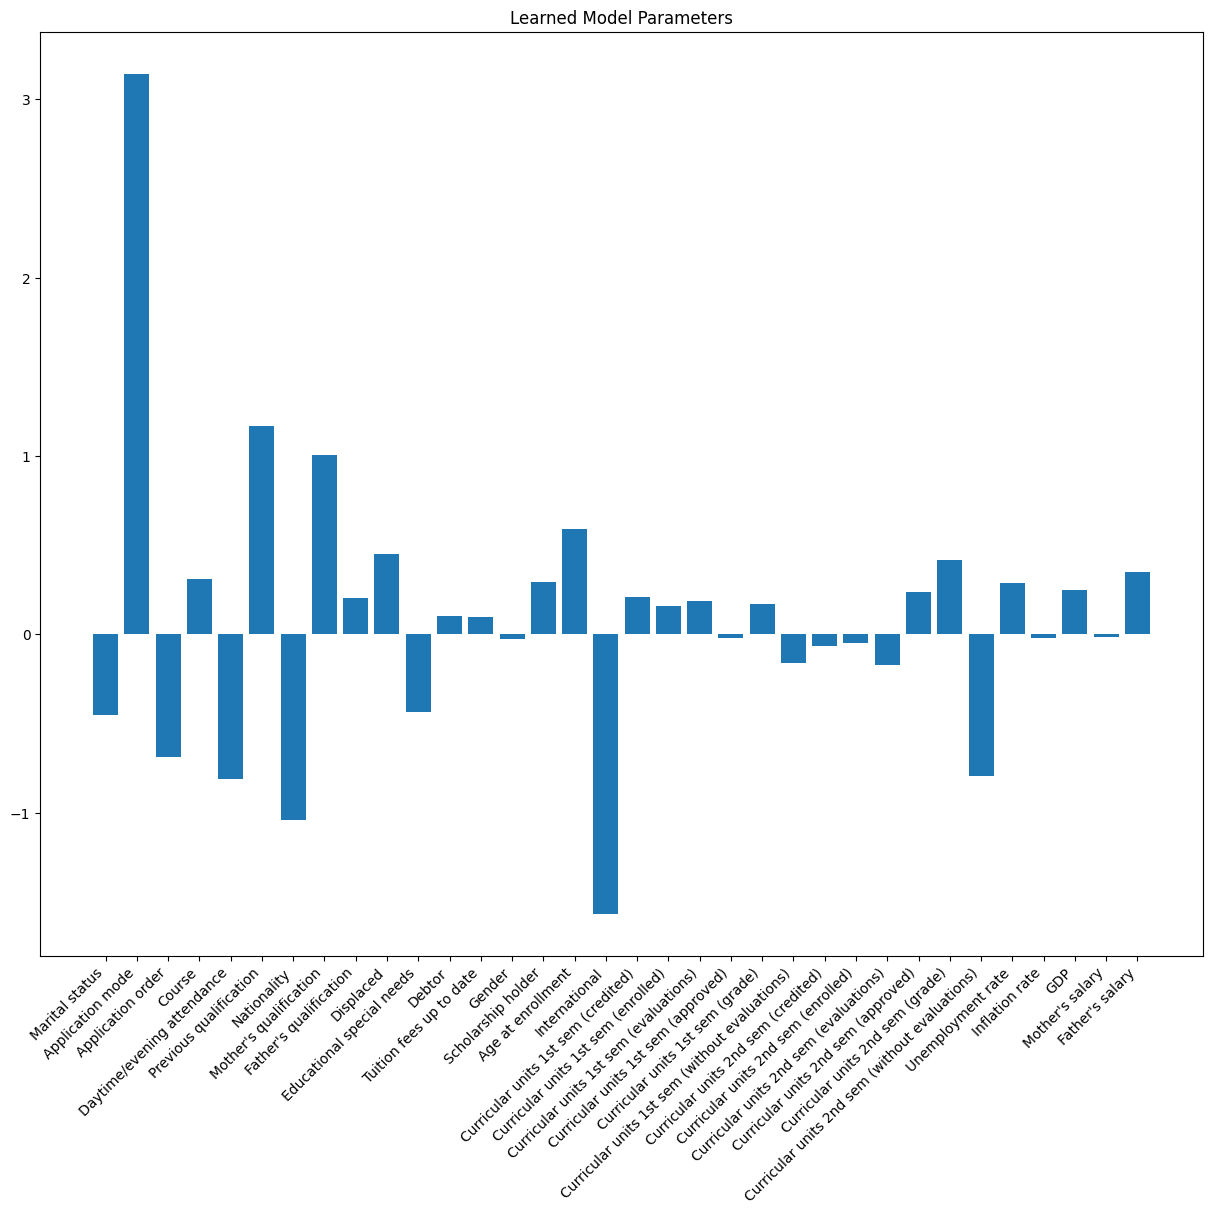

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from random import shuffle
import random

features = [2, 5, 10, 15, 20, 25,34]
folds = 10
hyperparameters = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100]

for value in features:
    pca = PCA(n_components=value)
    studentX_r = pca.fit(studentX).transform(studentX)
    X_train_val, X_test, y_train_val, y_test = train_test_split(studentX_r, studentY, test_size=0.0908, random_state=10)

    # get the number of samples in the training and validation set
    num_train_val = X_train_val.shape[0]

    # shuffle the index of samples in the train_val set
    index_of_samples = np.arange(num_train_val) 
    shuffle(index_of_samples)

    # split the index of the train_valid set into 10 folds
    index_of_folds = index_of_samples.reshape(folds, -1)

    best_acc = 0.0
    best_coeff = 0.0

    for coeff in hyperparameters:
    
        # 10-fold cross-validation
        sum_acc = 0.0
        for fold in range(folds):
        
            index_of_folds_temp = index_of_folds.copy()
            
            valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
            train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
            
            # training set
            X_train = X_train_val[train_index]
            y_train = y_train_val[train_index]
            
            # validation set
            X_valid = X_train_val[valid_index]
            y_valid = y_train_val[valid_index]
                    
            # build the model with different hyperparameters
            clf = LogisticRegression(penalty='l2', C=coeff, solver='lbfgs', max_iter=1000)
            
            #train the model with the training set
            clf.fit(X_train, y_train)
            
            y_valid_pred = clf.predict(X_valid)
            acc = accuracy_score(y_valid, y_valid_pred)
            
            sum_acc += acc
    
        cur_acc = sum_acc / folds
    
        # store the best hyperparameter
        if cur_acc > best_acc:
            best_acc = cur_acc
            best_coeff = coeff

    if(value==2):
        print("Training Values: {}, Testing Values: {}".format(X_train_val.shape[0], X_test.shape[0]))
        
    X_train_val = normalizer.fit_transform(X_train_val)
    X_test = normalizer.transform(X_test)

    # Then, please run logistic regression model with the dimensionality-reduced data.
    clf = LogisticRegression(penalty='l2', solver='lbfgs', C=best_coeff)
    clf.fit(X_train_val, y_train_val)
    y_test_pred = clf.predict(X_test)   

    # Compare the classification performance (e.g. accuracy, F1-score) when using different number of features(e.g. 2, 5, 10).\
    acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    matthews = matthews_corrcoef(y_test, y_test_pred)
    print("n = " + str(value) + " components: Hyperparameter: {:}, Accuracy: {:.3f}, Recall: {:.3f}, Precision: {:.3f}, F1: {:.3f}, MCC: {:.3f}".format(best_coeff, acc, recall, precision, f1, matthews))

plt.bar(studentX.columns, clf.coef_[0], figure=plt.figure(1, [15, 12]))
plt.xticks(rotation=45, ha='right')
plt.title('Learned Model Parameters')